In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dset_rain = xr.open_dataset('data/twp1440cpol.rainfall.c1.20170304.nc')
dset_class = xr.open_dataset('data/twp1440cpol.steinerclass.c1.20170304.nc')

rain = dset_rain.radar_estimated_rain_rate.values
stein = dset_class.steiner_echo_classification.values

In [3]:
x = np.linspace(-150, 150, 117)
y = np.linspace(-150, 150, 117)
theta = np.linspace(0, 2 * np.pi)

In [4]:
step = 81
midnight_rain = rain[step, :, :]
midnight_class = stein[step, :, :]
dtime = pd.Timestamp(dset_rain.time[step].to_pandas())

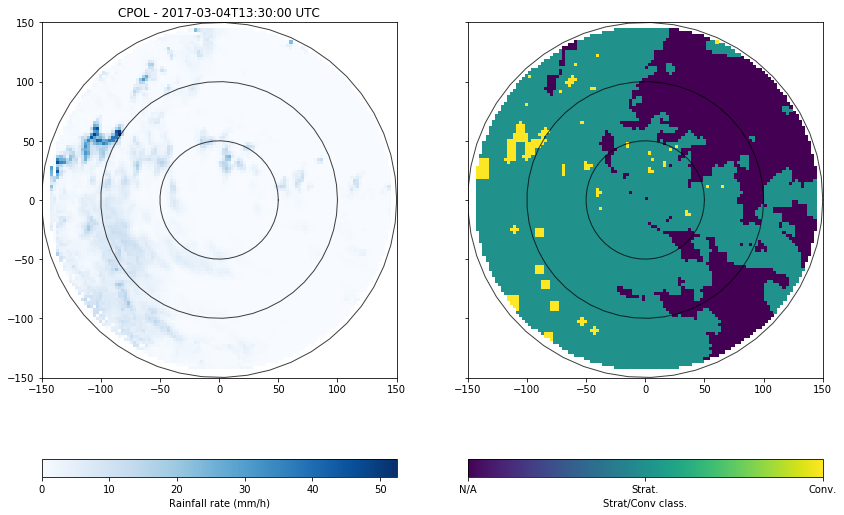

In [5]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 10))

im0 = ax[0].pcolormesh(x, y, midnight_rain, cmap='Blues', vmin=0)
im1 = ax[1].pcolormesh(x, y, midnight_class, vmin=0, vmax=2)

fig.colorbar(im0, ax=ax[0], orientation='horizontal', label='Rainfall rate (mm/h)')
cbar = fig.colorbar(im1, ax=ax[1], orientation='horizontal', label='Strat/Conv class.')
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['N/A', 'Strat.', 'Conv.'])
ax[0].set_title(f'CPOL - {dtime.isoformat()} UTC')

for a in ax:
    [a.plot(r * np.cos(theta), r * np.sin(theta), 'k', linewidth=1, alpha=0.75) for r in [50, 100, 150]]
    a.set_aspect(1)  # To make the axes orthonormed
    
plt.show()

## Exercise 1:

Can you compute the mean:
- 1) total rainfall rate,
- 2) convective rainfall rate, 
- 3) stratiform rainfall rate, 

over the domain for the midnight scan?

In [6]:
# Solution: %load solutions/0201.py

## Exercise 2:

The convective area fraction is the area occupied by convective rain divided by the total domain area. Can you compute for the midnight scan:
- 1) the total area of clouds,
- 2) the total area occupied by convective clouds,
- 3) the convective area fraction?

Note that the size of a pixel is 2.5 km by 2.5 km.

In [7]:
# Solution: %load solutions/0202.py

This is not enough! I want to know the number of convective towers and the area of each convective tower!

In [8]:
from scipy import ndimage

In [9]:
conv_0 = midnight_class.astype(int)
conv_0[conv_0 != 2] = 0

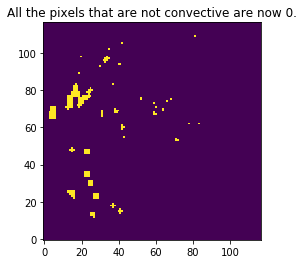

In [10]:
plt.imshow(conv_0, origin='ij')
plt.title('All the pixels that are not convective are now 0.')
plt.show()

In [11]:
labeled, num_objects = ndimage.label(conv_0 == 2)
slices = ndimage.find_objects(labeled)

Don't know what these 2 functions do? 

- label: Label features in an array (here my feature is convection)
- find_objects: generate a list of slices for the labeled features (or objects); useful for finding features’ position or dimensions.

Here's the documentation on Scipy:
[label](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.label.html#scipy.ndimage.label)

In [12]:
pixel_area = 2.5 ** 2
sl = slices[0]
area = pixel_area * np.sum(conv_0[sl] == 2)

In [13]:
print(f'The area of one of the {num_objects} convective towers is {area} km2.')

The area of one of the 34 convective towers is 43.75 km2.


# Exercise 3

Can you compute the area of for all the convective towers and plot the result?

In [14]:
# Solution :%load solutions/0203.py